<a href="https://colab.research.google.com/github/rmsno/IBM_Projects/blob/main/M3ExploratoryDataAnalysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-7-292d61c38c0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot= sns.distplot(df['ConvertedComp'], hist= False)


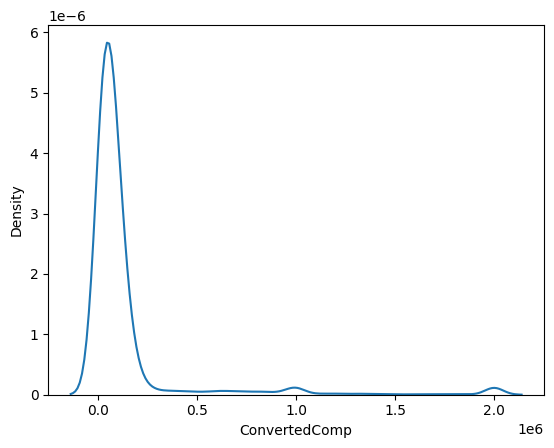

In [7]:
# your code goes here
plot= sns.distplot(df['ConvertedComp'], hist= False)
#df['ConvertedComp'].plot()

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 0, 'number of salary')

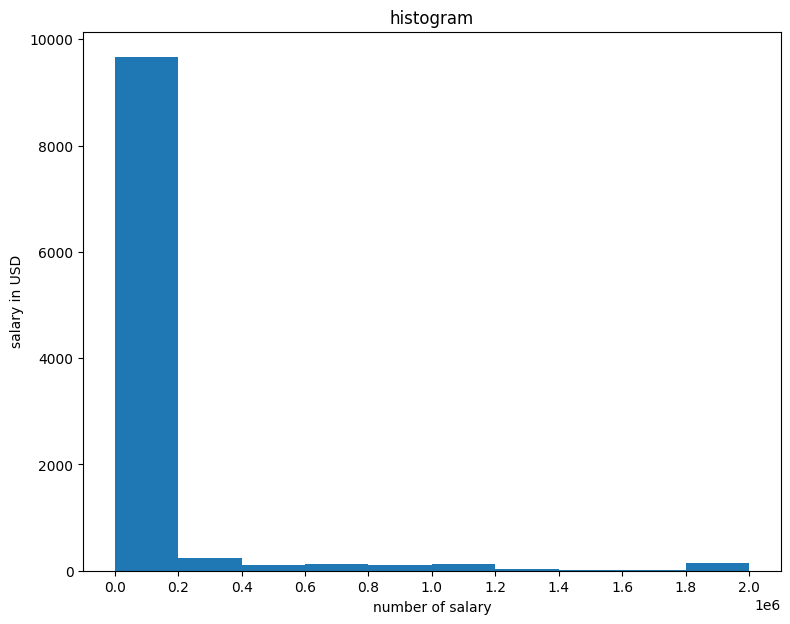

In [14]:
# your code goes here
count, bins = np.histogram(df['ConvertedComp'].dropna())
df['ConvertedComp'].plot(kind='hist', figsize=(9,7), xticks=bins)
#for design
plt.title("histogram")
plt.ylabel('salary in USD')
plt.xlabel('number of salary')

What is the median of the column `ConvertedComp`?


In [19]:
# your code goes here
df['ConvertedComp'].median()
# df['Age'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [23]:
# your code goes here
df_womens= df.groupby(df["Gender"], as_index=False)['ConvertedComp'].median()
df_womens

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [24]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

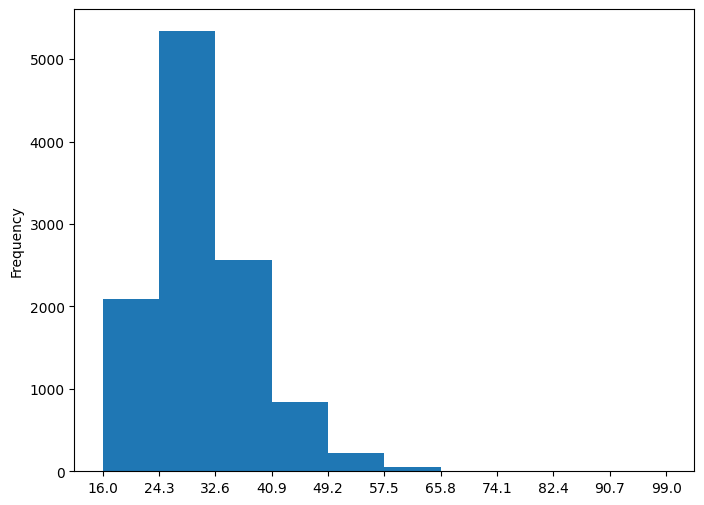

In [29]:
# your code goes here
count, bin = np.histogram(df['Age'].dropna())
df['Age'].plot(kind='hist', figsize=(8,6), xticks= bin)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


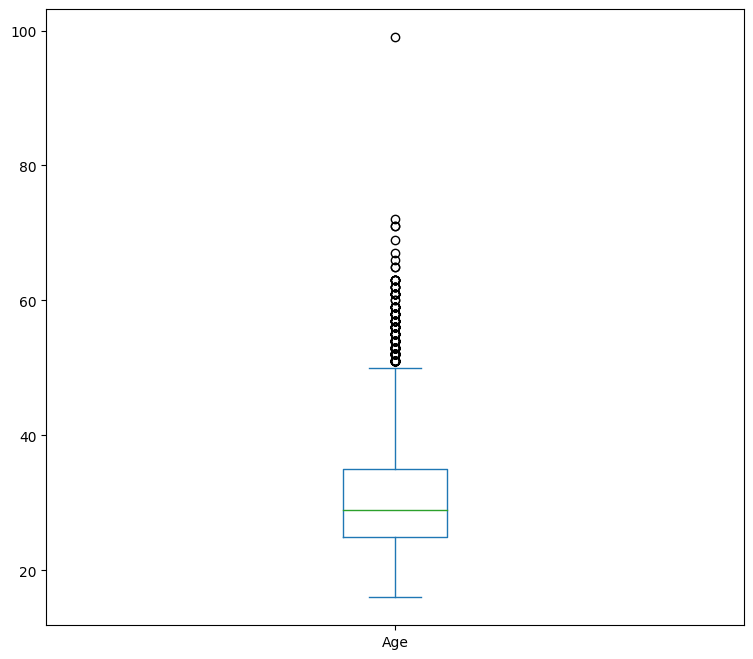

In [36]:
df['Age'].plot(kind='box', figsize=(9,8))
plt.show()

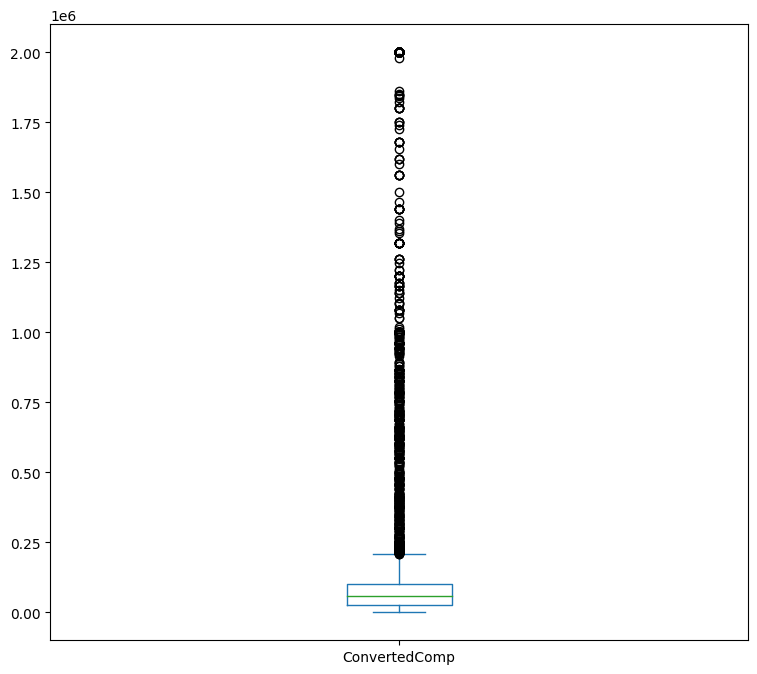

In [35]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(9,8))
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
# your code goes here
q1= df['ConvertedComp'].quantile(0.25)
q3= df['ConvertedComp'].quantile(0.75)
IQR=q3-q1
IQR

73132.0

Find out the upper and lower bounds.


In [38]:
# your code goes here
min= df['ConvertedComp'].min()
max= df['ConvertedComp'].max()
print(min)
print(max)

0.0
2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [44]:
# your code goes here
((df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))).sum()


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [46]:
# your code goes here
rem_otlier=((df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR)))
df[rem_otlier]= np.nan
df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
# your code goes here
df.corr()

<ipython-input-47-2278162ba8b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,879
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950,NaN
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371,NaN
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821,NaN
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452,NaN
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961,NaN
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000,NaN
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
